<a href="https://colab.research.google.com/github/monicaghosal/DataCurationManagement/blob/main/Amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import csv
import time

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from difflib import SequenceMatcher

## LED LIGHTS - PRODUCT 1

In [ ]:
df = pd.read_csv('/content/sample_data/amazon-reviews.csv')
df

,product,reviewTitle,reviewContent,reviewUser,reviewRating,reviewLink,reviewWebsite,verified,reviewDataCreated,reviewDataDiscovered,color,size,style,Data provided by FeedCheck.co
0,,Length not enough and could be brighter.,It’s shorter than you think so maybe a longer ...,Brian,4,https://www.amazon.com/gp/customer-reviews/RSK...,www.amazon.com,yes,27-Mar-22,25-Apr-22,NaN,NaN,NaN,NaN
1,,Multi color,Product is great,billy,4,https://www.amazon.com/gp/customer-reviews/RIQ...,www.amazon.com,yes,2-Apr-22,25-Apr-22,NaN,NaN,NaN,NaN
2,,Love it,Great colors,Paul J.,5,https://www.amazon.com/gp/customer-reviews/R3T...,www.amazon.com,yes,2-Apr-22,25-Apr-22,NaN,NaN,NaN,NaN
3,,Product I recieved was previously opened,This was an obviously previously opened produc...,Michele,1,https://www.amazon.com/gp/customer-reviews/R96...,www.amazon.com,yes,5-Apr-22,25-Apr-22,NaN,NaN,NaN,NaN
4,,Cheaper than before,"I bought this back in early 2021, they are ama...",Ricky Shepherd Ricky Shepherd,1,https://www.amazon.com/gp/customer-reviews/R2I...,www.amazon.com,yes,6-Apr-22,25-Apr-22,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,,Quality & Great Price,Product arrived on time.\n\nPerfect lighting a...,Volkan Berksoy,5,https://www.amazon.com/gp/customer-reviews/RHV...,www.amazon.com,yes,8-Oct-19,25-Apr-22,NaN,NaN,NaN,NaN
1810,,Excellent design,Make the patio look great.my daughter loves it.,Eric Eric,5,https://www.amazon.com/gp/customer-reviews/R1J...,www.amazon.com,yes,24-Sep-19,25-Apr-22,NaN,NaN,NaN,NaN
1811,,bright lights with instant color changing via ...,I bought this for my friend who is studying in...,Henry,5,https://www.amazon.com/gp/customer-reviews/R33...,www.amazon.com,yes,25-Sep-19,25-Apr-22,NaN,NaN,NaN,NaN
1812,,Good Deal,Beyond expectation. Product packed with good p...,Yuhan Bi,5,https://www.amazon.com/gp/customer-reviews/R3D...,www.amazon.com,yes,28-Sep-19,25-Apr-22,NaN,NaN,NaN,NaN




```
# This is formatted as code
```

# Separating large dataframe into columns we need to use

In [ ]:
df2 = df[['reviewUser', 'reviewTitle', 'reviewContent']]
df2

,reviewUser,reviewTitle,reviewContent
0,Brian,Length not enough and could be brighter.,It’s shorter than you think so maybe a longer ...
1,billy,Multi color,Product is great
2,Paul J.,Love it,Great colors
3,Michele,Product I recieved was previously opened,This was an obviously previously opened produc...
4,Ricky Shepherd Ricky Shepherd,Cheaper than before,"I bought this back in early 2021, they are ama..."
...,...,...,...
1809,Volkan Berksoy,Quality & Great Price,Product arrived on time.\n\nPerfect lighting a...
1810,Eric Eric,Excellent design,Make the patio look great.my daughter loves it.
1811,Henry,bright lights with instant color changing via ...,I bought this for my friend who is studying in...
1812,Yuhan Bi,Good Deal,Beyond expectation. Product packed with good p...


In [ ]:
df2.duplicated(subset=['reviewContent']).reset_index()

,index,0
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
1809,1809,False
1810,1810,False
1811,1811,False
1812,1812,False


In [ ]:
print('There are no duplicate reviews for Amazon data.')

There are no duplicate reviews for Amazon data.


# Calculating the frequency of unique words in reviews

In [ ]:
start = time.perf_counter()

In [ ]:
# df = pd.read_csv('amazon-reviews.csv')[['reviewTitle', 'reviewContent', 'reviewUser']]

with open('/content/sample_data/amazon-reviews.csv', encoding="utf8", newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [ ]:
data = data[::2]

In [ ]:
uniqueTitle = {}
uniqueContent = {}

In [ ]:
for i in range(1, len(data) - 1):
    for k in range(i + 1, len(data)):
        for word in data[i][0].split():
            if word in data[k][0].split() and len(word) > 3:
                if word not in uniqueTitle:
                    uniqueTitle[word.lower()] = 1
                else:
                    uniqueTitle[word.lower()] += 1
        for word in data[i][1].split():
            if word in data[k][1].split() and len(word) > 3:
                if word not in uniqueContent:
                    uniqueContent[word.lower()] = 1
                else:
                    uniqueContent[word.lower()] += 1

In [ ]:
print(sorted(uniqueTitle.items(), key=lambda x: x[1]))
print(sorted(uniqueContent.items(), key=lambda x: x[1]))

[]
[('previously', 1), ('very', 1), ("don't", 1), ("doesn't", 1), ('nice', 1), ('good', 1), ('under', 1), ('don’t', 1), ('true', 1), ('these', 1), ('once', 1), ('quality,', 1), ('great', 1), ("it's", 1), ('decent', 1), ('love', 1), ('purchasing', 1), ('awesome', 1), ('would', 1), ('cool', 1), ('need', 1), ('small', 1), ('they', 1), ('really', 1), ('accurate', 1), ('gave', 1), ('only', 1), ('best', 1), ('work.', 1), ('defective', 1), ('works', 1), ('great!', 1), ('beautiful', 1), ('straight', 1), ('worked', 1), ('size', 1), ('half', 1), ('different', 1), ('worth', 1), ('horrible', 1), ('easy', 1), ('broke', 1), ('return', 1), ('less', 1), ('lasted', 1), ('cheap', 1), ('boxes', 1), ('kids', 1), ('but...', 1), ('brand', 1), ('second', 1), ('wanted', 1), ('excellent', 1), ('super', 1), ('anymore', 1), ('awesome!', 1), ('described', 1), ('recommended', 1), ('it’s', 1), ('because', 1), ('ordered', 1), ('loves', 1), ('broken', 1), ('amazing', 1), ('supply', 1), ('soon', 1), ('walls', 1), ('te

In [ ]:
freq1 = sorted(uniqueContent.items(), key=lambda x: x[1])
print(freq1)

[('previously', 1), ('very', 1), ("don't", 1), ("doesn't", 1), ('nice', 1), ('good', 1), ('under', 1), ('don’t', 1), ('true', 1), ('these', 1), ('once', 1), ('quality,', 1), ('great', 1), ("it's", 1), ('decent', 1), ('love', 1), ('purchasing', 1), ('awesome', 1), ('would', 1), ('cool', 1), ('need', 1), ('small', 1), ('they', 1), ('really', 1), ('accurate', 1), ('gave', 1), ('only', 1), ('best', 1), ('work.', 1), ('defective', 1), ('works', 1), ('great!', 1), ('beautiful', 1), ('straight', 1), ('worked', 1), ('size', 1), ('half', 1), ('different', 1), ('worth', 1), ('horrible', 1), ('easy', 1), ('broke', 1), ('return', 1), ('less', 1), ('lasted', 1), ('cheap', 1), ('boxes', 1), ('kids', 1), ('but...', 1), ('brand', 1), ('second', 1), ('wanted', 1), ('excellent', 1), ('super', 1), ('anymore', 1), ('awesome!', 1), ('described', 1), ('recommended', 1), ('it’s', 1), ('because', 1), ('ordered', 1), ('loves', 1), ('broken', 1), ('amazing', 1), ('supply', 1), ('soon', 1), ('walls', 1), ('tech'

Visualization

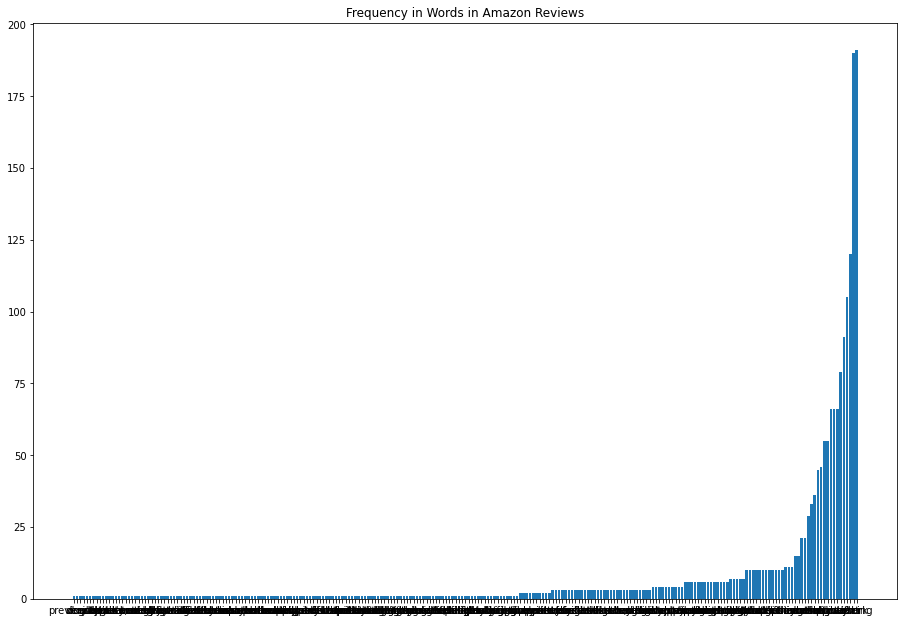

In [ ]:
import matplotlib.pyplot as plt 

fig = plt.figure()
titles = [x[0] for x in freq1]
counts = [x[1] for x in freq1]
ax1.set_ylabel('frequency')
ax1.set_title('words')

ax1 = fig.add_axes([0,0,2,2])
plt.title('Frequency in Words in Amazon Reviews')


ax1.bar(titles,counts)
plt.show()

### Calculating similarities in review names and review titles

In [ ]:
df['reviewUser'].value_counts().reset_index()

,index,reviewUser
0,Amazon Customer,93
1,Amazon Customer Amazon Customer,14
2,Kindle Customer,6
3,Ashley,5
4,Kimberly,4
...,...,...
1639,Sandra D Gable,1
1640,Abi,1
1641,Crystal Jacobs,1
1642,Harry Manuel,1


In [ ]:
df['reviewTitle'].value_counts().reset_index()

,index,reviewTitle
0,Great product,18
1,Great,16
2,Love it,11
3,Good,10
4,Perfect,10
...,...,...
1555,good for use,1
1556,Gift,1
1557,Lights great until they stop working,1
1558,Return,1


## JLO REVIEW - 2ND PRODUCT

In [ ]:
df = pd.read_csv('/content/sample_data/jlo_reviews.csv')
df

,product,reviewTitle,reviewContent,reviewUser,reviewRating,reviewLink,reviewWebsite,verified,reviewDataCreated,reviewDataDiscovered,color,size,style,Data provided by FeedCheck.co
0,,Packaging,The soap itself is fine. The bottle doesn’t cl...,Jessica,2.0,https://www.amazon.com/gp/customer-reviews/R2V...,www.amazon.com,yes,28 August 2021,26 April 2022,NaN,NaN,NaN,NaN
1,,Perfect for anyone,Works for everyone,Vickie Rockel,5.0,https://www.amazon.com/gp/customer-reviews/R1X...,www.amazon.com,yes,17 September 2021,26 April 2022,NaN,NaN,NaN,NaN
2,,Absolutely love it,I had to order the whole line on Amazon.us bec...,mary,5.0,https://www.amazon.com/gp/customer-reviews/R1M...,www.amazon.com,yes,24 September 2021,26 April 2022,NaN,NaN,NaN,NaN
3,,Great makeup remover,I have used many celebrity product lines. This...,Cortni Ware,4.0,https://www.amazon.com/gp/customer-reviews/RKQ...,www.amazon.com,no,10 October 2021,26 April 2022,NaN,NaN,NaN,NaN
4,,Best cleanser,"This cleans my face gently, removes my eye mak...",Ellen Gardner,5.0,https://www.amazon.com/gp/customer-reviews/R2Q...,www.amazon.com,yes,16 October 2021,26 April 2022,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,,Good,Removed makeup pretty good,Silvia,5.0,https://www.amazon.com/gp/customer-reviews/R10...,www.amazon.com,yes,26 January 2021,26 April 2022,NaN,NaN,NaN,NaN
72,,Expensive and made me break out.,Hated everything about this. Gotta love stars ...,JP,1.0,https://www.amazon.com/gp/customer-reviews/R1U...,www.amazon.com,no,26 January 2021,26 April 2022,NaN,NaN,NaN,NaN
73,,It’s a flop,Entire product line is a weak attempt at skinc...,NinjaShopper,1.0,https://www.amazon.com/gp/customer-reviews/R34...,www.amazon.com,no,28 January 2021,26 April 2022,NaN,NaN,NaN,NaN
74,,Amazing no other word.,I love how this cream makes my face feel so so...,Ivan Martinez Nieves,5.0,https://www.amazon.com/gp/customer-reviews/R1K...,www.amazon.com,yes,30 January 2021,26 April 2022,NaN,NaN,NaN,NaN


In [ ]:
df2 = df[['reviewTitle', 'reviewContent', 'reviewUser']]
df2

,reviewTitle,reviewContent,reviewUser
0,Packaging,The soap itself is fine. The bottle doesn’t cl...,Jessica
1,Perfect for anyone,Works for everyone,Vickie Rockel
2,Absolutely love it,I had to order the whole line on Amazon.us bec...,mary
3,Great makeup remover,I have used many celebrity product lines. This...,Cortni Ware
4,Best cleanser,"This cleans my face gently, removes my eye mak...",Ellen Gardner
...,...,...,...
71,Good,Removed makeup pretty good,Silvia
72,Expensive and made me break out.,Hated everything about this. Gotta love stars ...,JP
73,It’s a flop,Entire product line is a weak attempt at skinc...,NinjaShopper
74,Amazing no other word.,I love how this cream makes my face feel so so...,Ivan Martinez Nieves


In [ ]:
df2.duplicated(subset=['reviewContent']).reset_index()

,index,0
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
1809,1809,False
1810,1810,False
1811,1811,False
1812,1812,False


In [ ]:
df2.duplicated(subset=['reviewUser']).reset_index()

,index,0
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
1809,1809,False
1810,1810,True
1811,1811,False
1812,1812,False


In [ ]:
print ('There are no duplicates in the jlo reviews' )

There are no duplicates in the jlo reviews


# Calculating the frequency of unique words in reviews

In [ ]:
start = time.perf_counter()

In [ ]:
# df = pd.read_csv('jlo_reviews.csv')[['reviewTitle', 'reviewContent', 'reviewUser']]

with open('/content/sample_data/jlo_reviews.csv', encoding="utf8", newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [ ]:
 data = data[::2]

[['product', 'reviewTitle', 'reviewContent', 'reviewUser', 'reviewRating', 'reviewLink', 'reviewWebsite', 'verified', 'reviewDataCreated', 'reviewDataDiscovered', 'color', 'size', 'style', 'Data provided by FeedCheck.co'], [' ', 'Perfect for anyone', 'Works for everyone', 'Vickie Rockel', '5.0', 'https://www.amazon.com/gp/customer-reviews/R1XV8U0S1W7A64/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&ASIN=B08PQ7SB8X', 'www.amazon.com', 'yes', '17 September 2021', '26 April 2022', '', '', ''], [' ', 'Great makeup remover', 'I have used many celebrity product lines. This is the first that actually took off my make up without having to use cleaning wipes afterward. I love the cleanser and the serum. I have officially switched from meaningful beauty to jlo. 💗', 'Cortni Ware', '4.0', 'https://www.amazon.com/gp/customer-reviews/RKQ7J278REH17/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&ASIN=B08PQ7SB8X', 'www.amazon.com', 'no', '10 October 2021', '26 April 2022', '', '', ''], [' ', 'Loved the scent of JLo Cream Cleanser'

In [ ]:
uniqueTitle = {}
uniqueContent = {}

In [ ]:
for i in range(1, len(data) - 1):
    for k in range(i + 1, len(data)):
        for word in data[i][0].split():
            if word in data[k][0].split() and len(word) > 3:
                if word not in uniqueTitle:
                    uniqueTitle[word.lower()] = 1
                else:
                    uniqueTitle[word.lower()] += 1
        for word in data[i][1].split():
            if word in data[k][1].split() and len(word) > 3:
                if word not in uniqueContent:
                    uniqueContent[word.lower()] = 1
                else:
                    uniqueContent[word.lower()] += 1

In [ ]:
print(sorted(uniqueTitle.items(), key=lambda x: x[1]))
print(sorted(uniqueContent.items(), key=lambda x: x[1]))

[]
[('remover', 1), ('great', 1), ('feels', 1), ('best', 1), ('feeling', 1), ('good', 1), ('love', 1), ('just', 1), ('cleans', 1), ('makeup', 3), ('face', 3), ('skin', 3), ('cleanser', 4), ('product', 6)]


In [ ]:
freq = sorted(uniqueContent.items(), key=lambda x: x[1])
print(freq)




[('remover', 1), ('great', 1), ('feels', 1), ('best', 1), ('feeling', 1), ('good', 1), ('love', 1), ('just', 1), ('cleans', 1), ('makeup', 3), ('face', 3), ('skin', 3), ('cleanser', 4), ('product', 6)]


Visualization

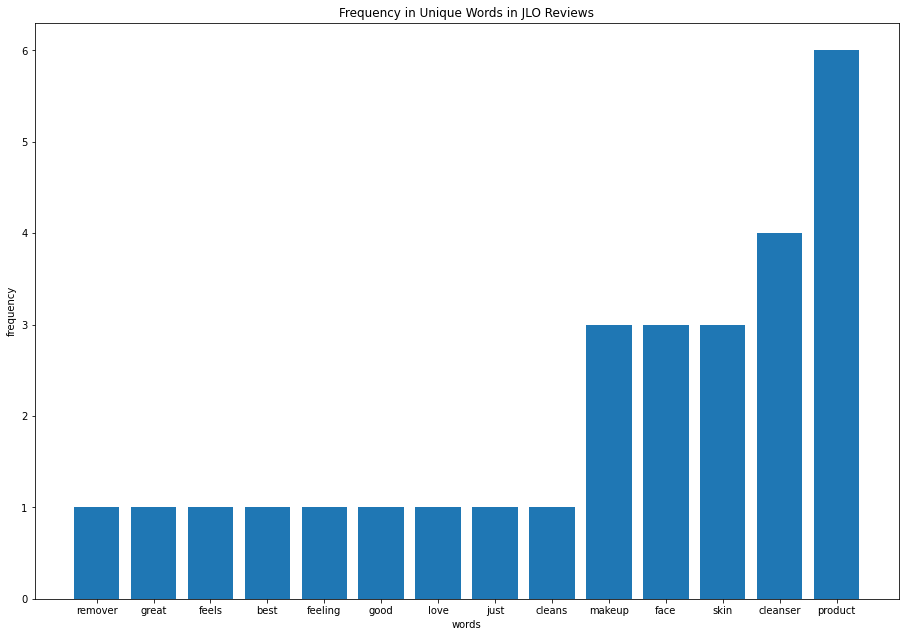

In [ ]:
import matplotlib.pyplot as plt 

fig = plt.figure()
titles = [x[0] for x in freq]
counts = [x[1] for x in freq]

ax = fig.add_axes([0,0,2,2])
ax.set_ylabel('frequency')
ax.set_xlabel('words')
ax.set_title('Frequency in Unique Words in JLO Reviews')

ax.bar(titles,counts)
plt.show()

### Calculating similarities in reviewer names & titles

In [ ]:
df['reviewUser'].value_counts().reset_index()

,index,reviewUser
0,Amazon Customer,4
1,Jessica,2
2,Veronica,1
3,Kimberly J. Muthersbaugh,1
4,Charity F.,1
...,...,...
67,mary kate priest,1
68,Savannah,1
69,Ligia albaine,1
70,ELVIS,1


In [ ]:
print('2 users in the JLO cleanser reviews were both named Jessica.')

2 users in the JLO cleanser reviews were both named Jessica.


In [ ]:
df['reviewTitle'].value_counts().reset_index().reset_index()

,level_0,index,reviewTitle
0,0,Great makeup remover,2
1,1,Best cleanser,2
2,2,Packaging,1
3,3,Save your money!!!,1
4,4,It Works Wonders!!!,1
...,...,...,...
69,69,Feels good looks good,1
70,70,Drying around the eyes,1
71,71,That it did what it says,1
72,72,A+ for Make up remover,1


In [ ]:
print("2 JLO cleanser reviews were both titled 'Great makeup remover'.\n2 JLO cleanser reviews were both titled 'Best cleanser'.")

2 JLO cleanser reviews were both titled 'Great makeup remover'.
2 JLO cleanser reviews were both titled 'Best cleanser'.


In [ ]:
review_title_count = df['reviewTitle'].value_counts()

review_title_count.reset_index()

,index,reviewTitle
0,Great product,18
1,Great,16
2,Love it,11
3,Good,10
4,Perfect,10
...,...,...
1555,good for use,1
1556,Gift,1
1557,Lights great until they stop working,1
1558,Return,1
